# Project Submission

Navigation for the Udacity Ud893 Deep Reinforcement Learning Nanodegree (DRLND)

## Imports and Dependencies

In [1]:
import sys
sys.path.append("./python")
import random
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
from datetime import datetime

from unityagents import UnityEnvironment

%matplotlib inline

## Unity Environment

Note that if your operating system is Windows (64-bit), the Unity environment is included and you can run the below environment instantiation cell.  

However, if you're using a different operating system, download the file you require from one of the following links:

- Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip)
- Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip)
- Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86.zip)

Then, place the file in the main project directory folder and unzip (or decompress) the file.  Modify the file_name in the below cell and then run the cell.

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Get Default Brain

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## Main Training Loop Function

In [4]:
def training_loop(agent, model_filename='checkpoint.pth', n_episodes=2000, max_t=1000, eps_start=1.0, 
                  eps_end=0.01, eps_decay=0.9):  
    """XXX Deep Q-Learning Training Loop
    
    Params
    ======
        agent (function): agent function
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(int(action))[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = np.float64(env_info.rewards[0])                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), model_filename)
            break
    return scores

## DQN Agent

Episode 100	Average Score: 4.33
Episode 200	Average Score: 8.30
Episode 296	Average Score: 13.01
Environment solved in 296 episodes!	Average Score: 13.01
Time:  0:07:26.173768


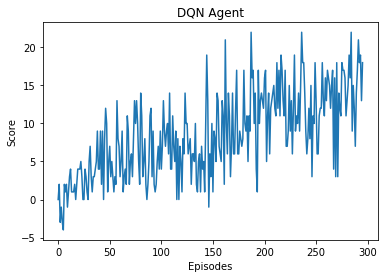

In [5]:
from dqn_agent import DQN_Agent

agent = DQN_Agent(lr=5e-4, state_size=37, action_size=4, seed=0)

start = datetime.now()
scores = training_loop(agent, model_filename='dqn_model.pth')
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

# plot the scores
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.title('DQN Agent')
plt.show()

# purposely left commented.  Leave as is.
# env.close()

## Double DQN Agent

Episode 100	Average Score: 2.65
Episode 200	Average Score: 7.71
Episode 297	Average Score: 13.07
Environment solved in 297 episodes!	Average Score: 13.07
Time:  0:07:39.916447


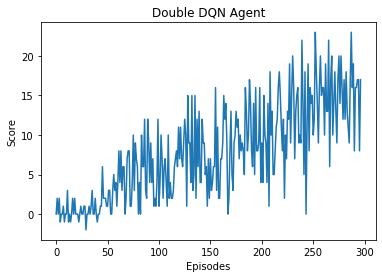

In [5]:
from double_dqn_agent import Double_DQN_Agent

agent = Double_DQN_Agent(lr=5e-4, state_size=37, action_size=4, seed=0)

start = datetime.now()
scores = training_loop(agent,  model_filename='double_dqn_model.pth', eps_decay=0.6)
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

# plot the scores
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.title('Double DQN Agent')
plt.show()

# Dueling DQN Agent

Episode 100	Average Score: 0.16
Episode 200	Average Score: 1.62
Episode 300	Average Score: 5.42
Episode 400	Average Score: 8.20
Episode 500	Average Score: 11.85
Episode 600	Average Score: 13.00

Environment solved in 600 episodes!	Average Score: 13.00
Time:  0:20:33.387654


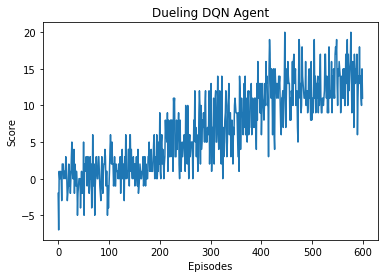

In [5]:
from dueling_dqn_agent import Dueling_DQN_Agent

agent = Dueling_DQN_Agent(lr=1e-4, state_size=37, action_size=4, seed=0)

start = datetime.now()
scores = training_loop(agent, model_filename='dueling_dqn_model.pth', eps_start=0.1, eps_end=0.0001 ,eps_decay=0.9999)
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

# plot the scores
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.title('Dueling DQN Agent')
plt.show()

## Prioritized Experience Replay using Proportional Prioritization (PEB-PP) Agent

Episode 100	Average Score: 2.31
Episode 200	Average Score: 8.17
Episode 300	Average Score: 11.64
Episode 338	Average Score: 13.08
Environment solved in 338 episodes!	Average Score: 13.08
Time:  1:37:37.038224


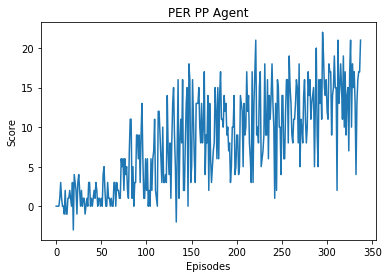

In [5]:
from PER_PP_agent import PER_PP_Agent

agent = PER_PP_Agent(lr=5e-4/8.0, beta=0.4, alpha=0.6, state_size=37, action_size=4, seed=0)

start = datetime.now()
scores = training_loop(agent, model_filename='per_pp_model.pth', eps_decay=0.9)
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

# plot the scores
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.title('PER PP Agent')
plt.show()

## Prioritized Experience Replay using Rank Based Prioritization (PEB-RBP) Agent

Episode 100	Average Score: 1.51
Episode 200	Average Score: 7.03
Episode 300	Average Score: 9.84
Episode 400	Average Score: 11.99
Episode 437	Average Score: 13.06
Environment solved in 437 episodes!	Average Score: 13.06
Time:  2:29:38.699448


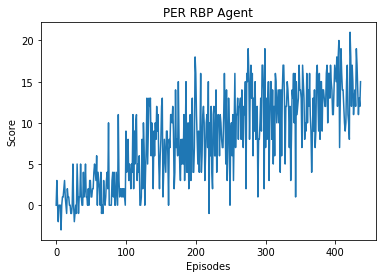

In [5]:
from PER_RBP_agent import PER_RBP_Agent

agent = PER_RBP_Agent(lr=5e-4/8.0, beta=0.4, alpha=0.6 ,state_size=37, action_size=4, seed=0)

start = datetime.now()
scores = training_loop(agent, model_filename='per_rbp_model.pth', eps_decay=0.9)
end = datetime.now()
time_taken = end - start
print('Time: ',time_taken) 

# plot the scores
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episodes')
plt.title('PER RBP Agent')
plt.show()

## Run Smart Agent

In [19]:
select = random.randint(0,4)

if select == 0:
    from dqn_agent import DQN_Agent
    agent = DQN_Agent(lr=5e-4, state_size=37, action_size=4, seed=0)
    agent.qnetwork_local.load_state_dict(torch.load('dqn_model.pth')) # load weights from file
elif select == 1:
    from double_dqn_agent import Double_DQN_Agent
    agent = Double_DQN_Agent(lr=5e-4, state_size=37, action_size=4, seed=0)
    agent.qnetwork_local.load_state_dict(torch.load('double_dqn_model.pth'))
elif select == 2:
    from dueling_dqn_agent import Dueling_DQN_Agent
    agent = Dueling_DQN_Agent(lr=1e-4, state_size=37, action_size=4, seed=0)
    agent.qnetwork_local.load_state_dict(torch.load('dueling_dqn_model.pth'))
elif select == 3:
    from PER_PP_agent import PER_PP_Agent
    agent = PER_PP_Agent(lr=5e-4/8.0, beta=0.4, alpha=0.6, state_size=37, action_size=4, seed=0)
    agent.qnetwork_local.load_state_dict(torch.load('per_pp_model.pth'))
elif select == 4:
    from PER_RBP_agent import PER_RBP_Agent
    agent = PER_RBP_Agent(lr=5e-4/8.0, beta=0.4, alpha=0.6 ,state_size=37, action_size=4, seed=0)
    agent.qnetwork_local.load_state_dict(torch.load('per_rbp_model.pth'))

agent_list = ['DQN','Double DQN', 'Dueling DQN', 'PER-PP', 'PER-RBP']
print(agent_list[select]+' agent chosen')

for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0

    for j in range(500):
        action = agent.act(state)
        env_info = env.step(int(action))[brain_name]        # send the action to the environment
        state = env_info.vector_observations[0]   # get the next state
        reward = np.float64(env_info.rewards[0])                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished                    
        
        if done:
            break
            
        score += reward
        
        if score == 13:
            break
        print('\rEpisode: {}\tStep: {}\tScore: {}'.format(i+1, j+1, score), end="")
    print('\rEpisode: {}\tStep: {}\tScore: {}'.format(i+1, j+1, score))
        
# env.close()

DQN agent chosen
Episode: 1	Step: 201	Score: 13.0
Episode: 2	Step: 300	Score: 7.0
Episode: 3	Step: 300	Score: 10.0
Episode: 4	Step: 300	Score: 2.0
Episode: 5	Step: 300	Score: 0.0
